In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
np.random.seed(1)
def load_data(scale,eps_std):
    x = np.random.randn(scale)
    eps = np.random.randn(100)*eps_std
    y = -1+0.5*x+eps
    return x,y,eps

In [82]:
x,y,eps = load_data(100,0.5)

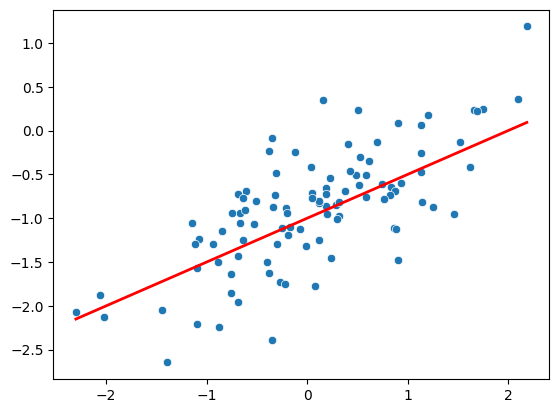

In [83]:
def scatter(x,y):
    sns.scatterplot(x=x, y=y)
    xx = np.linspace(x.min(), x.max(), 200)
    yy = -1 + 0.5*xx
    plt.plot(xx, yy, 'r-', lw=2)
    plt.show()
scatter(x,y)

In [68]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression(fit_intercept=True)
X = x.reshape(-1, 1)
model.fit(X, y)
print(model.intercept_,model.coef_)

-0.9938453263292362 [0.47947065]


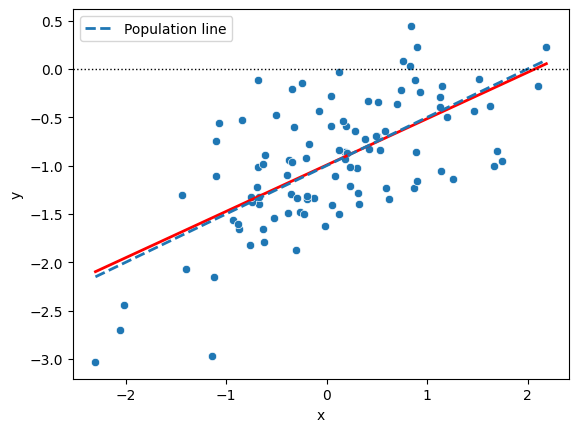

In [69]:
def showing(x,y,model):
    sns.scatterplot(x=x, y=y)
    xx = np.linspace(x.min(), x.max(), 200)
    yy = model.intercept_ + model.coef_*xx
    plt.plot(xx, yy, 'r-', lw=2)
    y_pop = -1 + 0.5*xx
    plt.plot(xx, y_pop, '--', lw=2, label='Population line')
    plt.axhline(0, ls=':', lw=1, color='k')
    plt.xlabel('x'); plt.ylabel('y')
    plt.legend()
    plt.show()
showing(x,y,model)

In [76]:
from sklearn.preprocessing import PolynomialFeatures
X = x.reshape(-1, 1)  # 只有一列 x
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(X)   # 列为 [1, x, x^2]
model2 = LinearRegression(fit_intercept=True)
model2.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


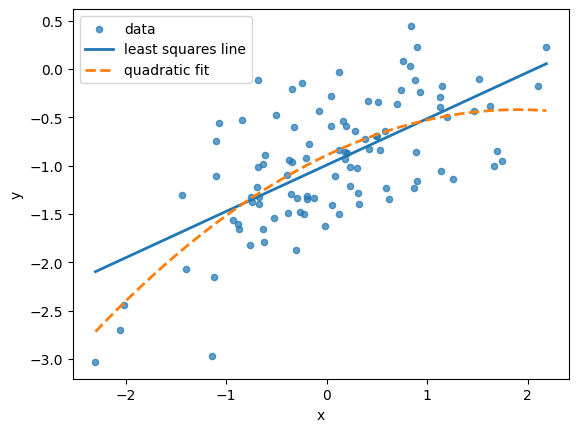

In [77]:
xx = np.linspace(x.min(), x.max(), 200).reshape(-1,1)
xx_poly = poly.transform(xx)   # 不能直接把 xx 喂给模型
yhat = model2.predict(xx_poly)
plt.scatter(x, y, s=20, alpha=0.7, label='data')
plt.plot(xx, model.predict(xx), lw=2, label='least squares line')
plt.plot(xx, yhat, lw=2, linestyle='--', label='quadratic fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

0.4644515372778454
0.4166907694822326


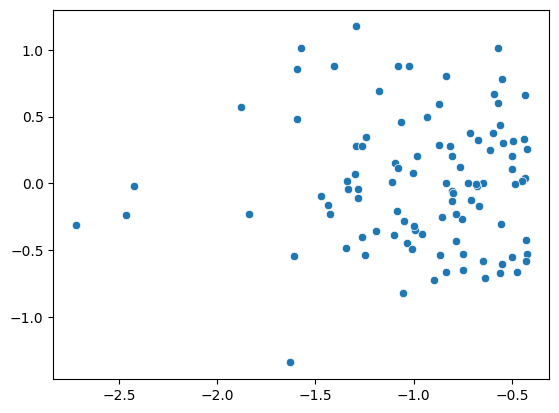

In [78]:
pred = y - model2.predict(X_poly)
sns.scatterplot(x=model2.predict(X_poly), y=pred)
print(model2.score(X_poly, y))
print(model.score(X,y))

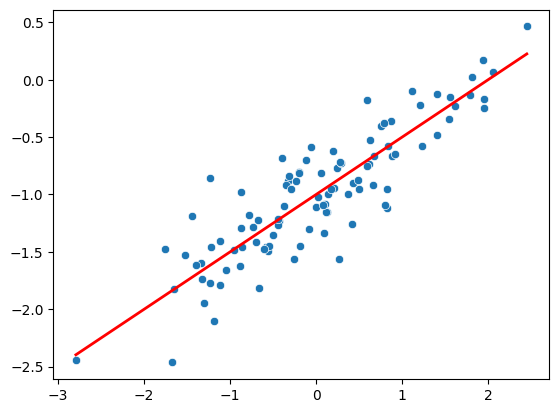

In [84]:
x,y,eps = load_data(100,0.25)
scatter(x,y)

-1.0049537080294153 [0.48606081]


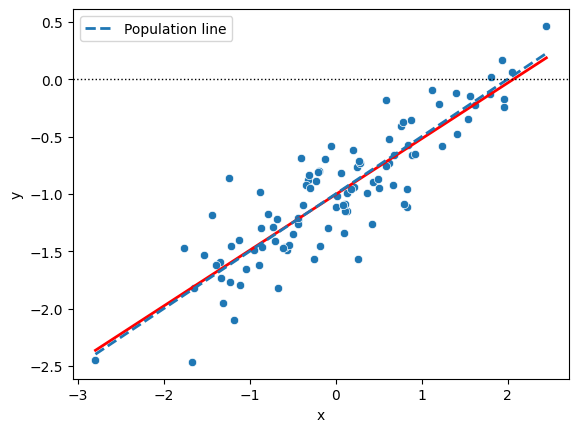

In [91]:
model = LinearRegression(fit_intercept=True)
X = x.reshape(-1, 1)
model.fit(X, y)
print(model.intercept_,model.coef_)
showing(x,y,model)

In [87]:
X = x.reshape(-1, 1)  # 只有一列 x
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(X)   # 列为 [1, x, x^2]
model2 = LinearRegression(fit_intercept=True)
model2.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


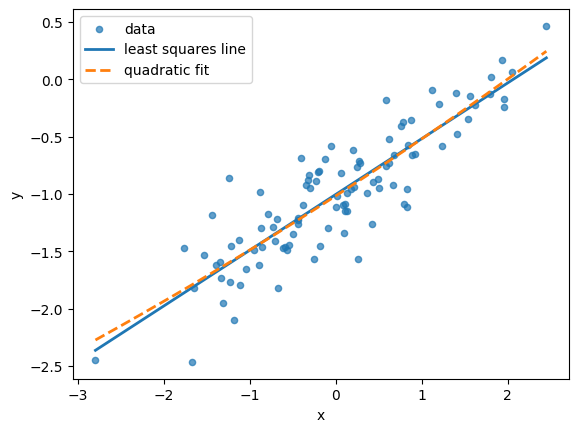

0.7725224067077856
0.7716277963213483


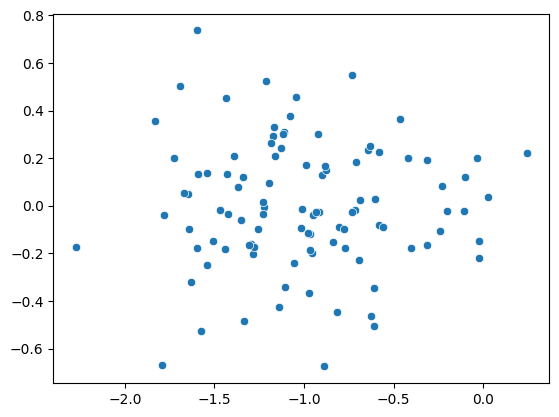

In [90]:
xx = np.linspace(x.min(), x.max(), 200).reshape(-1,1)
xx_poly = poly.transform(xx)   # 不能直接把 xx 喂给模型
yhat = model2.predict(xx_poly)
plt.scatter(x, y, s=20, alpha=0.7, label='data')
plt.plot(xx, model.predict(xx), lw=2, label='least squares line')
plt.plot(xx, yhat, lw=2, linestyle='--', label='quadratic fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
pred = y - model2.predict(X_poly)
sns.scatterplot(x=model2.predict(X_poly), y=pred)
print(model2.score(X_poly, y))
print(model.score(X,y))

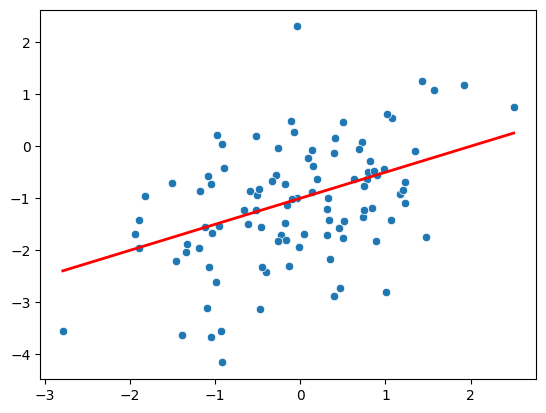

In [96]:
x,y,eps = load_data(100,1)
scatter(x,y)

-1.0941472659746545 [0.5566159]


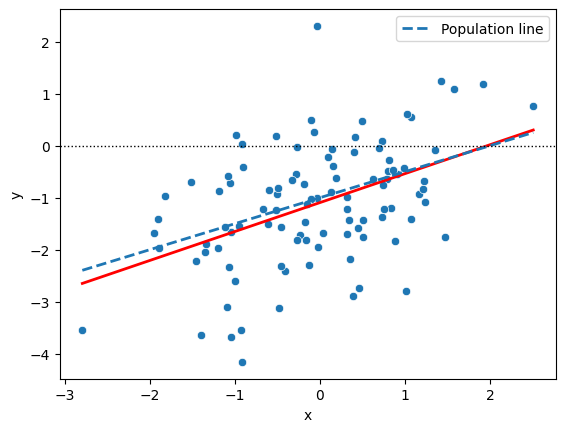

In [97]:
model = LinearRegression(fit_intercept=True)
X = x.reshape(-1, 1)
model.fit(X, y)
print(model.intercept_,model.coef_)
showing(x,y,model)

In [98]:
X = x.reshape(-1, 1)  # 只有一列 x
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(X)   # 列为 [1, x, x^2]
model2 = LinearRegression(fit_intercept=True)
model2.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


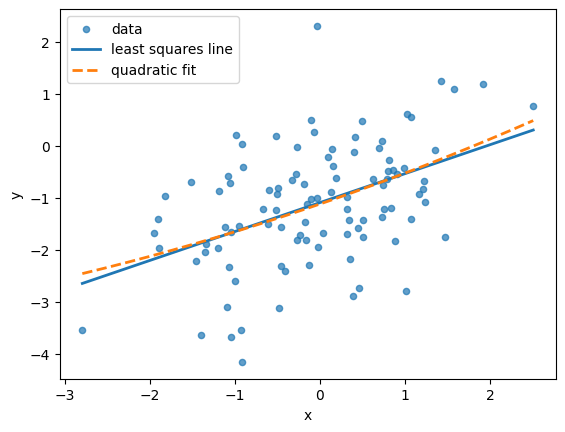

0.2146619067519151
0.21361532912643477


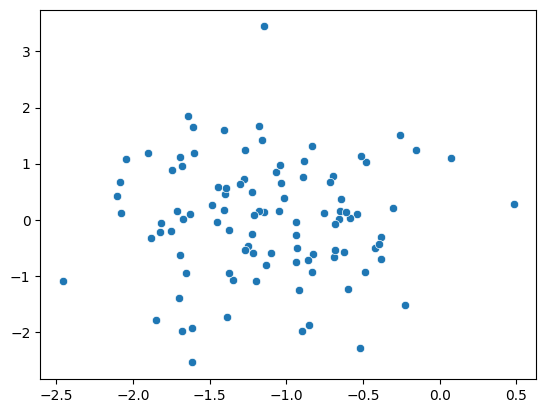

In [99]:
xx = np.linspace(x.min(), x.max(), 200).reshape(-1,1)
xx_poly = poly.transform(xx)   # 不能直接把 xx 喂给模型
yhat = model2.predict(xx_poly)
plt.scatter(x, y, s=20, alpha=0.7, label='data')
plt.plot(xx, model.predict(xx), lw=2, label='least squares line')
plt.plot(xx, yhat, lw=2, linestyle='--', label='quadratic fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
pred = y - model2.predict(X_poly)
sns.scatterplot(x=model2.predict(X_poly), y=pred)
print(model2.score(X_poly, y))
print(model.score(X,y))

In [101]:
import statsmodels.api as sm
x,y,eps = load_data(100,0.5)
X = sm.add_constant(x.reshape(-1,1))
res = sm.OLS(y, X).fit()
res.conf_int(alpha=0.05)      # 95% CI for [const, x]

array([[-1.15341921, -0.96511293],
       [ 0.39031396,  0.5684915 ]])

In [102]:
x,y,eps = load_data(100,0.25)
X = sm.add_constant(x.reshape(-1,1))
res = sm.OLS(y, X).fit()
res.conf_int(alpha=0.05)

array([[-1.01569148, -0.91483557],
       [ 0.39803827,  0.50441055]])

In [103]:
x,y,eps = load_data(100,1)
X = sm.add_constant(x.reshape(-1,1))
res = sm.OLS(y, X).fit()
res.conf_int(alpha=0.05)

array([[-1.33985338, -0.91853889],
       [ 0.34422104,  0.71077613]])